In [28]:
import io
import os
import pandas as pd
import sys
import time

from PIL import Image
from random import randint
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

sys.path.append('../..')
sys.path.append('../../../ajna_docs/commons')


In [29]:
from ajna_commons.flask.conf import SQL_URI
from ajna_commons.utils.images import mongo_image
from virasana.db import mongodb as db
from virasana.integracao.conformidade_alchemy import Conformidade
engine = create_engine(SQL_URI)

# Trazer lista de reefers

In [30]:
Session = sessionmaker(bind=engine)
session = Session()

In [49]:
rows = session.query(Conformidade.id_imagem).filter(Conformidade.isocode_group.startswith('R')).limit(1000).all()

60180cec0be94217a2cf5887


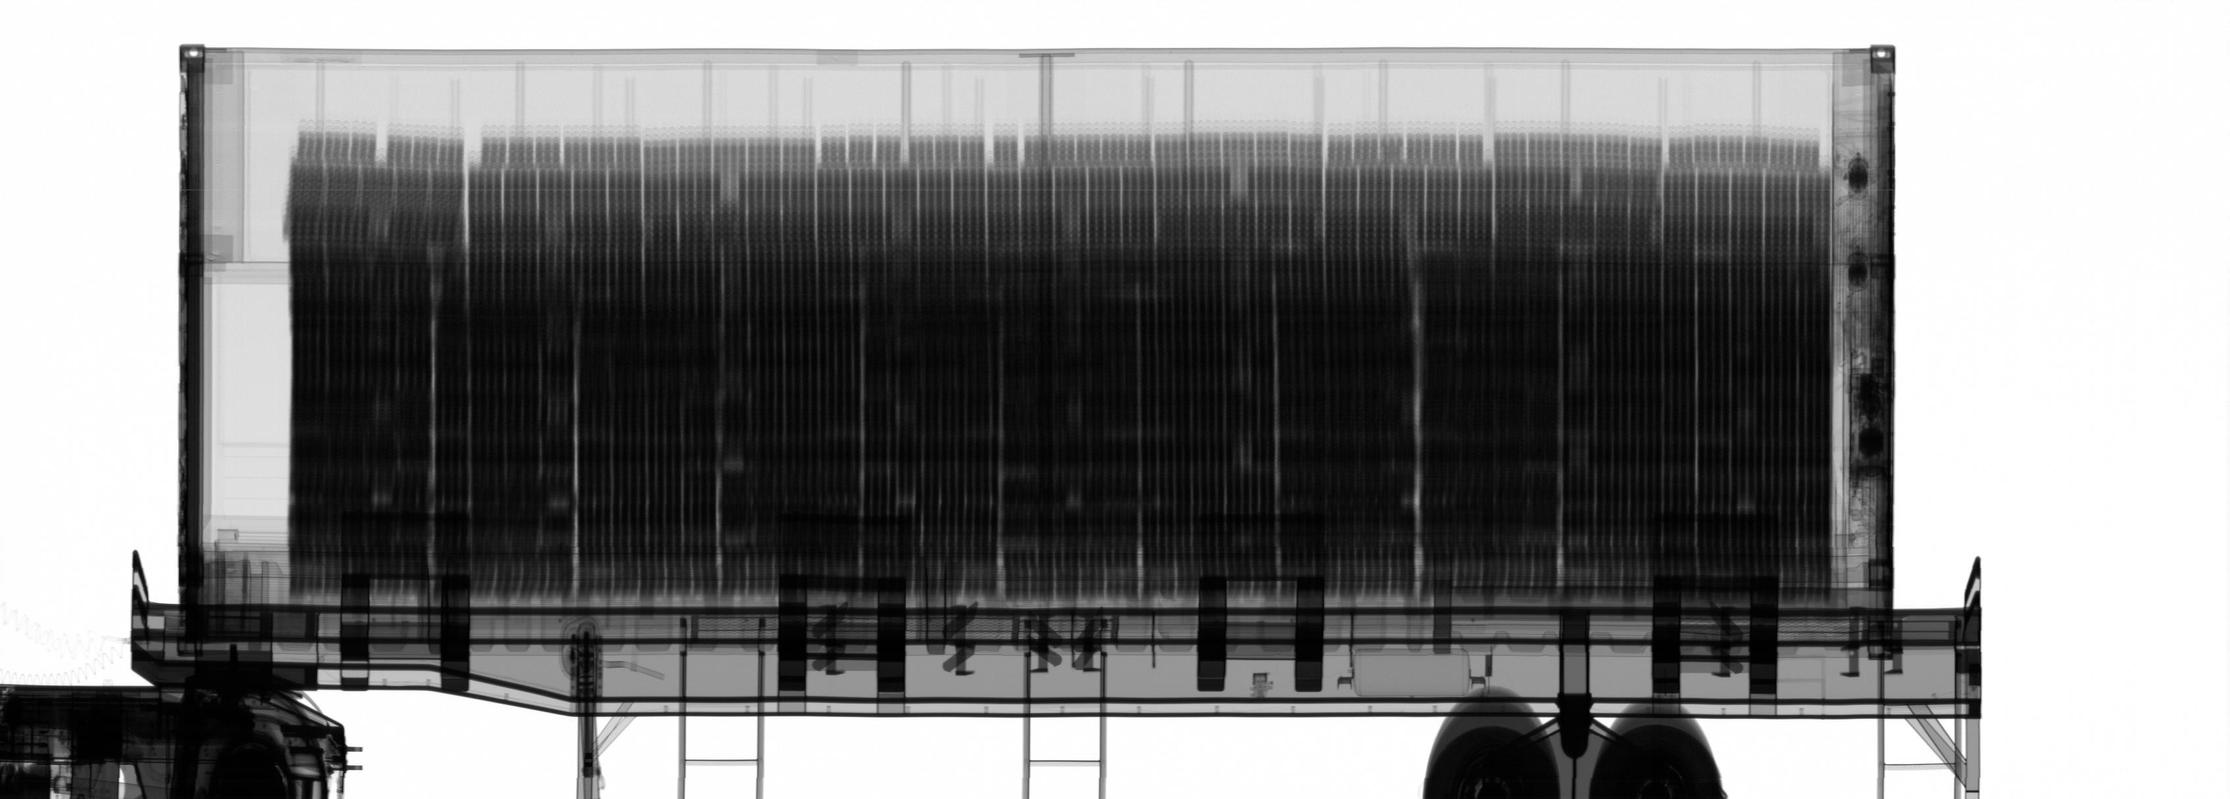

In [50]:
def rand_img(rows):
    i = randint(0, len(rows) - 1)
    _id  = rows[i][0]
    print(_id)
    image_bytes = mongo_image(db, _id)
    return Image.open(io.BytesIO(image_bytes))
rand_img(rows)
    

# Analisar nitidez

In [52]:
embraport = session.query(Conformidade.id_imagem).filter(Conformidade.cod_recinto == 'EMBRAPORT').limit(10).all()
stsbr = session.query(Conformidade.id_imagem).filter(Conformidade.cod_recinto == 'SBT').limit(10).all()

60180b0a0be94217a2cf0ff7


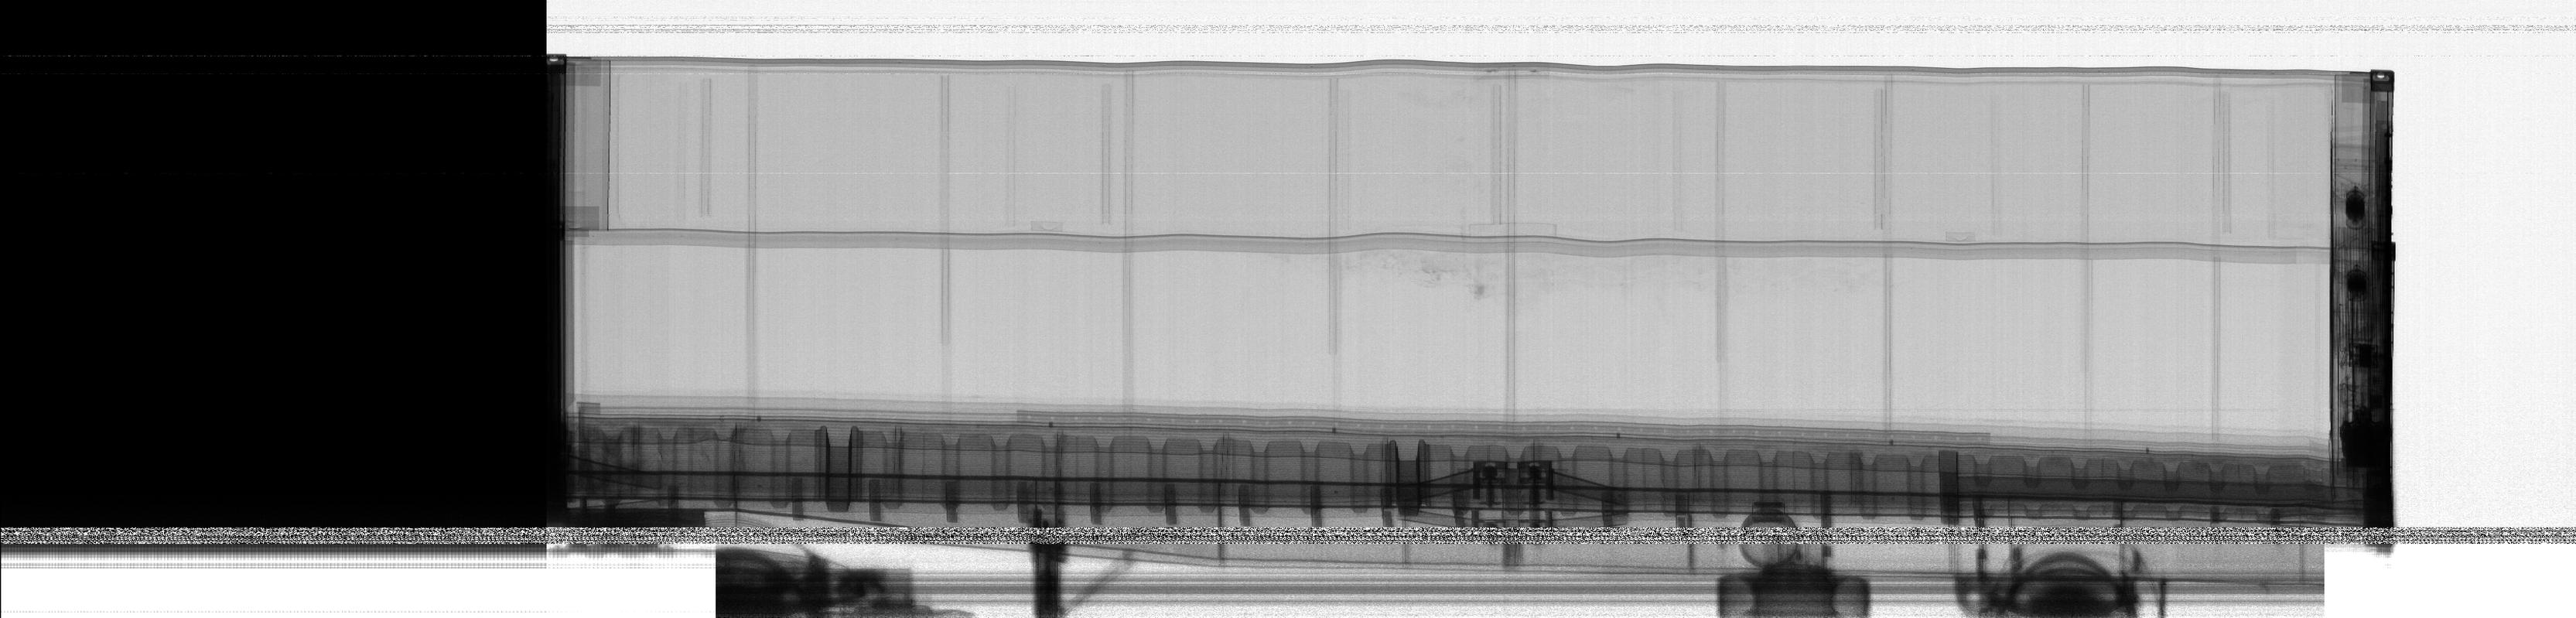

In [64]:
img1 = rand_img(embraport)
img1

60180b0a0be94217a2cf0fc7


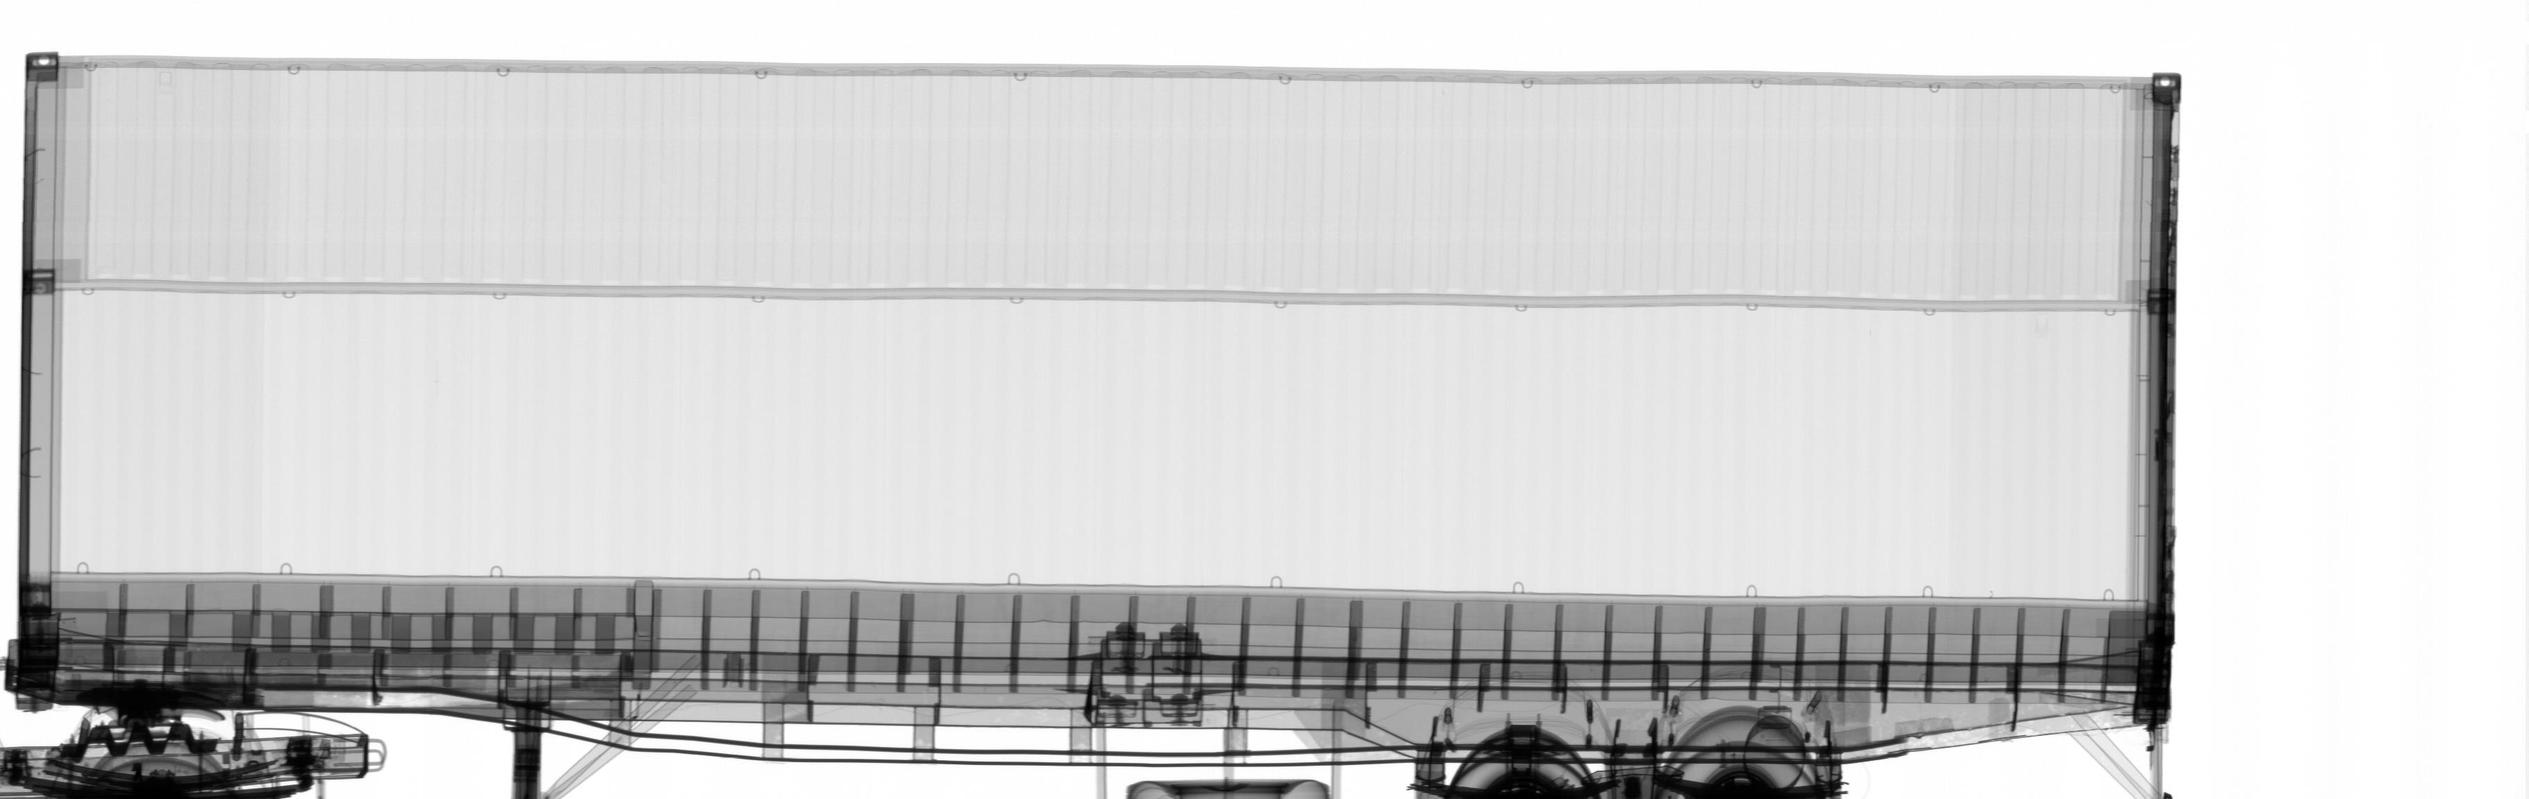

In [65]:
img2 = rand_img(stsbr)
img2

In [72]:
import cv2
import numpy as np

In [73]:
cv2.Laplacian(cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR), cv2.CV_64F).var()

2404.9154624714515

In [74]:
cv2.Laplacian(cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR), cv2.CV_64F).var()

151.56997592160113

In [76]:
image = cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.Laplacian(gray, cv2.CV_64F).var()

2404.91546247145

In [80]:
Image.open(io.BytesIO(gray))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001FBA99A09F0>

In [81]:
gray

array([[  0,   0,   0, ..., 248, 251, 251],
       [  0,   0,   0, ..., 250, 245, 245],
       [  0,   0,   0, ..., 249, 241, 241],
       ...,
       [  0, 174, 254, ..., 255, 255, 255],
       [  0, 174, 255, ..., 255, 255, 255],
       [  0, 174, 255, ..., 255, 255, 255]], dtype=uint8)